In [2]:
import pandas as pd
import numpy as np

from scipy import stats
from sklearn.utils import resample
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Preprocess data and truncate some values for better and easier visualization in plots
df = pd.read_csv('clean_kaggle_data.csv')
df.loc[(df.Q4 == 'No formal education past high school'),'Q4']='High school or Lower'
df.loc[(df.Q4 == 'Some college/university study without earning a bachelor’s degree'),'Q4']='Coll/Uni w/o Degree'
df.loc[(df.Q4 == 'Bachelor’s degree'),'Q4']='Bachelor'
df.loc[(df.Q4 == 'Doctoral degree'),'Q4']='Doctor'
df.loc[(df.Q4 == 'Master’s degree'),'Q4']='Master'
df.loc[(df.Q4 == 'Professional degree'),'Q4']='Professional'
df.loc[(df.Q4 == 'I prefer not to answer'),'Q4']='Not to Answer'
df.loc[(df.Q3 == 'United States of America'),'Q3']='USA'
df.loc[(df.Q3 == 'United Kingdom of Great Britain and Northern Ireland'),'Q3']='UK'
df.loc[(df.Q3 == 'Iran, Islamic Republic of...'),'Q3']='Iran'

df_1 = df.iloc[1:,:]


/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


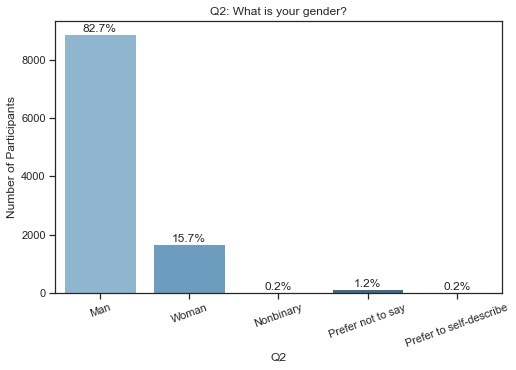

In [4]:
#Q1 Summarize main characteristics - gender
# want to see proportion of each gender
sns.set(style='ticks')

plt.figure(figsize=(8,5))
gender = sns.countplot(data=df, x='Q2', palette='Blues_d')

plt.xticks(rotation=20)
plt.title('Q2: What is your gender?')
gender.set_ylabel('Number of Participants')

#show percentage number on top of each bar
for p in gender.patches:
    percentage = '{:.1f}%'.format(100*float(p.get_height()/df.iloc[1:,:].shape[0]))
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    gender.annotate(percentage, (x,y), ha='center', va='bottom')
plt.show()

Text(0.5, 1.0, 'Number of participants at different age')

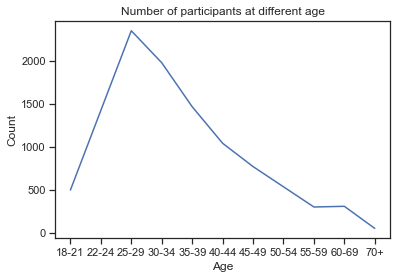

In [5]:
#Q1 Summarize main characteristics - age
# a lineplot to show decreasing trend
age = pd.DataFrame(df_1['Q1'].value_counts().reset_index().sort_values('index'))
sns.lineplot(x='index', y='Q1', data=age)
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Number of participants at different age')

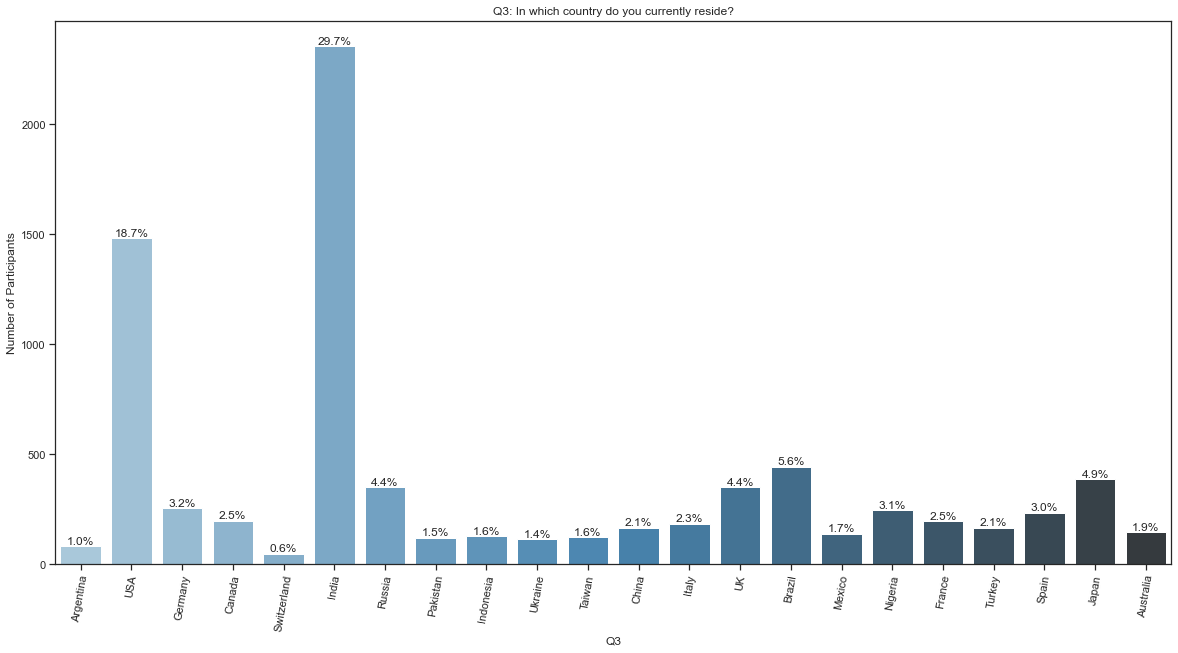

In [6]:
#Q1 Summarize main characteristics - country
#choose some important countries
sns.set(style='ticks')
cty = ['Argentina', 'USA', 'Germany','Canada','Switzerland','India','Russia','Netherland','Pakistan','Indonesia','Ukraine',
      'Taiwan','China','Italy','Columbia','UK','Brazil','Mexico','Nigeria','France','Turkey','Spain','Japan','Australia']

df_cty = df_1[df_1['Q3'].isin(cty)][['Q3']]
plt.figure(figsize=(20,10))

country = sns.countplot(data=df_cty, x='Q3', palette='Blues_d')

plt.xticks(rotation=80)
plt.title('Q3: In which country do you currently reside?')

country.set_ylabel('Number of Participants')
for p in country.patches:
    percentage = '{:.1f}%'.format(100*float(p.get_height()/df_cty.iloc[1:,:].shape[0]))
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    country.annotate(percentage, (x,y), ha='center', va='bottom')
plt.show()

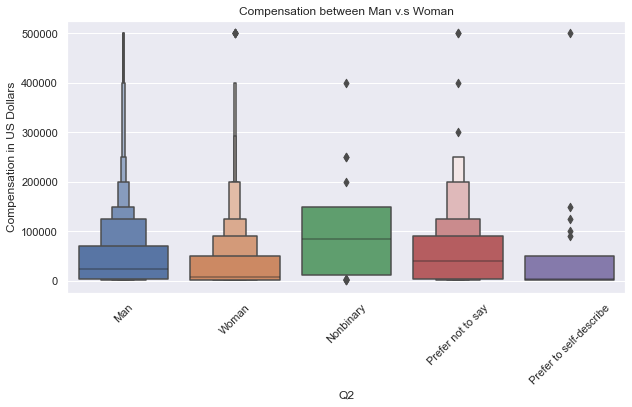

In [7]:
#Q1 Find trends in data - compensation level between man and woman

sns.set()
plt.figure(figsize=(10,5))

sns.boxenplot(x='Q2', y='Q24', data=df_1)
plt.xticks(rotation=45)
plt.ylabel('Compensation in US Dollars')
plt.title('Compensation between Man v.s Woman')
plt.show()

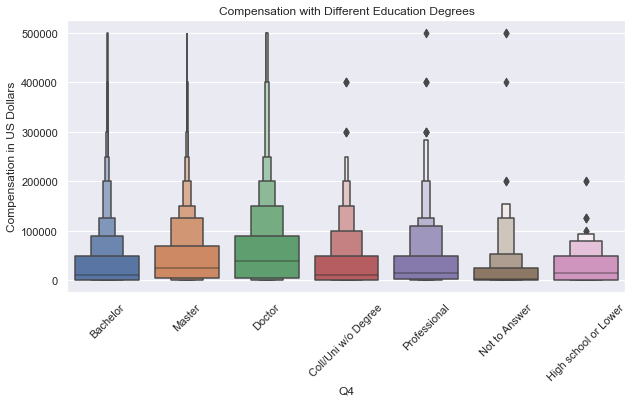

In [8]:
#Q1 Find trends in data - compensation level between different education degrees

sns.set()
plt.figure(figsize=(10,5))

sns.boxenplot(x='Q4', y='Q24', data=df_1)
plt.xticks(rotation=45)
plt.ylabel('Compensation in US Dollars')
plt.title('Compensation with Different Education Degrees')
plt.show()

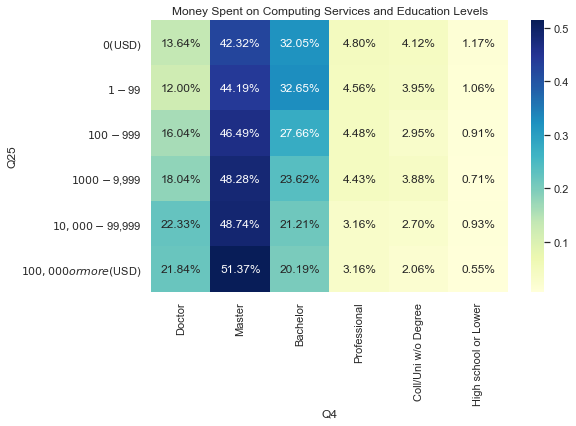

In [9]:
#Q1 Find trends in data - spending on computing services Q25 among different education degrees
education = df_1.loc[:,['Q4','Q25']].dropna()

spending = education.groupby(['Q25','Q4']).size().reset_index(name="Count")

total = spending.groupby('Q25').Count.sum().reset_index(name="Total")

spending = spending.join(total.set_index('Q25'), on='Q25')

spending['Percent'] = spending.Count/spending.Total

education_spending = spending.pivot(index='Q25', columns='Q4', values='Percent')

columns = ['Doctor', 'Master', 'Bachelor', 'Professional','Coll/Uni w/o Degree','High school or Lower']
order=['$0 ($USD)','$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','$100,000 or more ($USD)']

education_spending = education_spending.reindex(order).reindex(columns=columns)

plt.figure(figsize=(8,5))

sns.heatmap(education_spending, fmt='.2%', annot=True, cmap='YlGnBu')
plt.title('Money Spent on Computing Services and Education Levels')
plt.show()

In [10]:
#Q2 Preprocess by separating into two dataframes
df = pd.read_csv('clean_kaggle_data.csv')
is_woman = df['Q2'] == 'Woman'
df_woman = df[is_woman]
is_man = df['Q2'] == 'Man'
df_man = df[is_man]

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
#Q2a Descriptive statistics for woman
df_woman['Q24'].dropna().describe()

count      1683.000000
mean      36417.112299
std       59442.716093
min        1000.000000
25%        1000.000000
50%        7500.000000
75%       50000.000000
max      500000.000000
Name: Q24, dtype: float64

In [12]:
#Q2a Descriptive statistics for man
df_man['Q24'].dropna().describe()

count      8872.000000
mean      50750.619928
std       70347.974812
min        1000.000000
25%        3000.000000
50%       25000.000000
75%       70000.000000
max      500000.000000
Name: Q24, dtype: float64

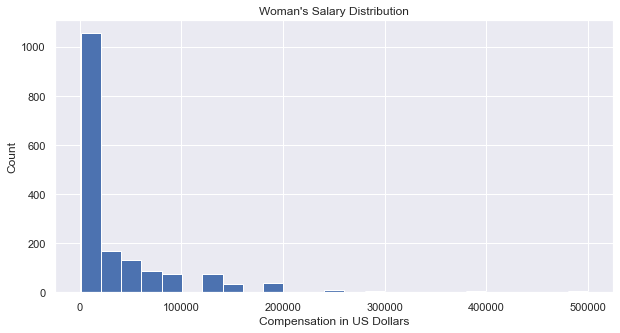

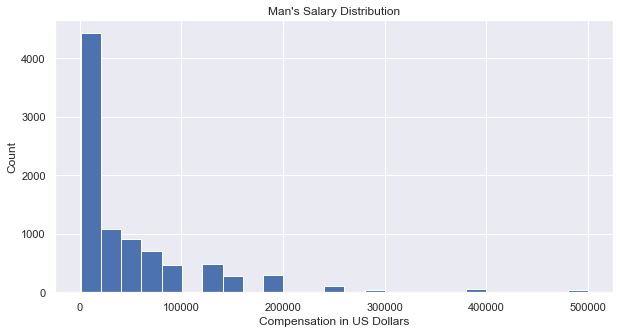

In [13]:
#Q2a Descriptive statistics in histogram
plt.figure(figsize=(10,5))
plt.hist(df_woman['Q24'], bins=25)
plt.title("Woman's Salary Distribution")
plt.xlabel('Compensation in US Dollars')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(df_man['Q24'], bins=25)
plt.title("Man's Salary Distribution")
plt.xlabel('Compensation in US Dollars')
plt.ylabel('Count')
plt.show()

In [14]:
#Question 2b two-sample t-test 
t, p_value = stats.ttest_ind(df_woman['Q24'], df_man['Q24'])
print ("Two sample t-test: t-statistics = %g  p-value = %g" % (t, p_value))

Two sample t-test: t-statistics = -7.84433  p-value = 4.77315e-15


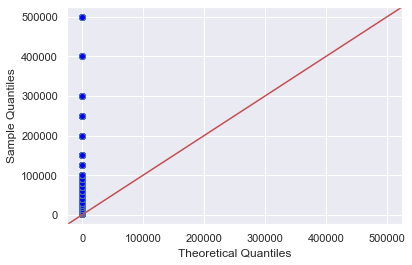

In [15]:
#Question 2b normal qq-plot 

sm.qqplot(df_woman['Q24'], line='45')
plt.show()


95.0 confidence interval 33684.46226975639 and 39396.330956625075


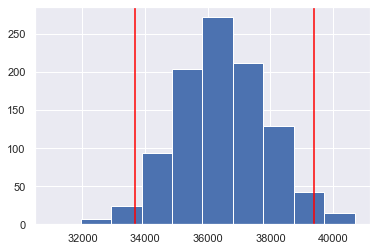

In [16]:
#Question 2c Bootstapping for Woman

boot_woman_mean=[]
for i in range(1000):
    boot_woman = resample(df_woman['Q24'], replace = True, n_samples=len(df_woman['Q24']))
    mean = np.mean(boot_woman)
    boot_woman_mean.append(mean)

boot_woman_mean = pd.DataFrame(boot_woman_mean)
plt.hist(boot_woman_mean)

#95% CI
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(boot_woman_mean, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(boot_woman_mean, p)
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

plt.axvline(lower, color='red')
plt.axvline(upper, color='red')
plt.show()


95.0 confidence interval 49231.17532687105 and 52242.283307033365


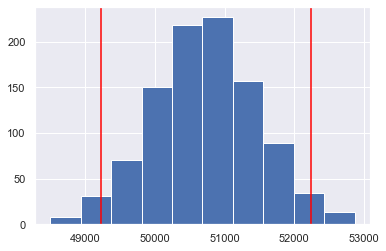

In [17]:
#Question 2c Bootstapping for Man

boot_man_mean=[]
for i in range(1000):
    boot_man = resample(df_man['Q24'], replace = True, n_samples=len(df_man['Q24']))
    mean = np.mean(boot_man)
    boot_man_mean.append(mean)

boot_man_mean = pd.DataFrame(boot_man_mean)
plt.hist(boot_man_mean)

#95% CI
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(boot_man_mean, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(boot_man_mean, p)
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

plt.axvline(lower, color='red')
plt.axvline(upper, color='red')
plt.show()

In [18]:
#Question 2c Normality test after bootstrapping
k_1, p_1 = stats.normaltest(boot_woman_mean)
print(k_1, p_1)
k_2, p_2 = stats.normaltest(boot_man_mean)
print(k_1, p_2)

[0.35793822] [0.83613173]
[0.35793822] [0.95732937]


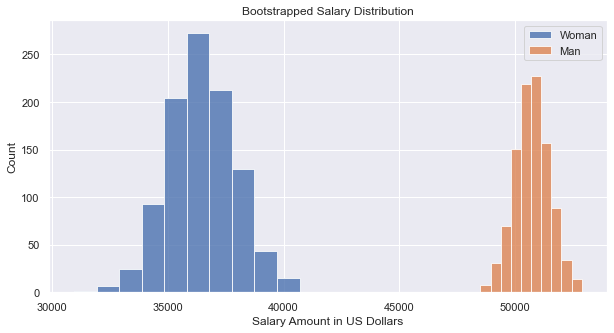

In [19]:
#Question 2c Bootstapping data on one plot
plt.figure(figsize=(10,5))
plt.hist(boot_woman_mean, alpha=0.8, label='Woman')
plt.hist(boot_man_mean, alpha=0.8, label='Man')
plt.legend()
plt.xlabel('Salary Amount in US Dollars')
plt.ylabel('Count')
plt.title('Bootstrapped Salary Distribution')
plt.show()


95.0 confidence interval -17428.32059388774 and -11125.357894237017


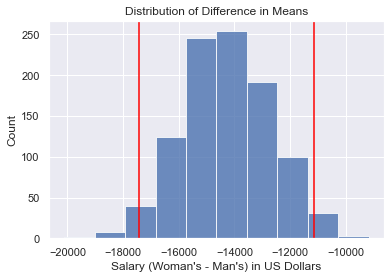

In [20]:
#Question 2c distribution of the difference in means
boot_mean_diff = pd.DataFrame(boot_woman_mean-boot_man_mean)
plt.hist(boot_mean_diff, alpha=0.8)

#95% CI
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(boot_mean_diff, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(boot_mean_diff, p)
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

plt.axvline(lower, color='red')
plt.axvline(upper, color='red')
plt.xlabel("Salary (Woman's - Man's) in US Dollars")
plt.ylabel('Count')
plt.title('Distribution of Difference in Means')
plt.show()

In [21]:
#Question 2d 

t_statistic, p_value = stats.ttest_ind(boot_woman_mean, boot_man_mean)
print ("Bootstrapped two sample t-test: t-statistics = %g  p-value = %g" % (t_statistic, p_value))

Bootstrapped two sample t-test: t-statistics = -278.689  p-value = 0


In [22]:
#Question 3a  Preprocess data & Descrptive data
df = pd.read_csv('clean_kaggle_data.csv')

education = ["Bachelor’s degree", "Master’s degree", "Doctoral degree"]
degree = df['Q4'].isin(education)
df_degree = df[degree][['Q4','Q24']]

df_2 = df_degree.groupby('Q4')
df_2.describe()

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Q24                                              \
                    count          mean           std     min     25%   
Q4                                                                      
Bachelor’s degree  3013.0  35732.824427  60247.753546  1000.0  1000.0   
Doctoral degree    1718.0  68719.441211  85403.650394  1000.0  5000.0   
Master’s degree    4879.0  52120.106579  67681.571528  1000.0  4000.0   

                                               
                       50%      75%       max  
Q4                                             
Bachelor’s degree  10000.0  50000.0  500000.0  
Doctoral degree    40000.0  90000.0  500000.0  
Master’s degree    25000.0  70000.0  500000.0

In [23]:
#Question 3b One-way ANOVA test
bachelor = df_degree[df_degree['Q4']=="Bachelor’s degree"][['Q4','Q24']]

master = df_degree[df_degree['Q4']=="Master’s degree"][['Q4','Q24']]

doctor = df_degree[df_degree['Q4']=="Doctoral degree"][['Q4','Q24']]

fvalue, pvalue = stats.f_oneway(bachelor['Q24'], master['Q24'], doctor['Q24'])
print ("Before Bootstrap ANOVA-test: F-statistics = %g  P-value = %g" % (fvalue, pvalue))

Before Bootstrap ANOVA-test: F-statistics = 129.756  P-value = 2.48521e-56



95.0 confidence interval 33586.44208430136 and 37960.45054762695


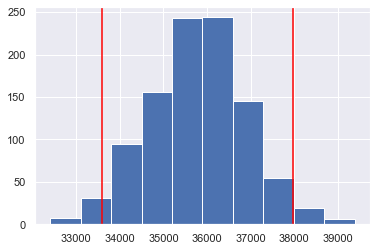

In [24]:
#Question 3c Bootstapping for Bachelor

boot_bach_mean=[]
for i in range(1000):
    boot_bach = resample(bachelor['Q24'], replace = True, n_samples=len(bachelor['Q24']))
    mean = np.mean(boot_bach)
    boot_bach_mean.append(mean)

boot_bach_mean = pd.DataFrame(boot_bach_mean)
plt.hist(boot_bach_mean)


alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(boot_bach_mean, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(boot_bach_mean, p)
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

plt.axvline(lower, color='red')
plt.axvline(upper, color='red')



95.0 confidence interval 50178.179442508714 and 54154.565484730476


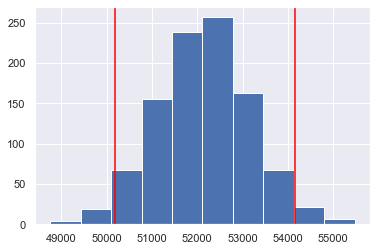

In [25]:
#Question 3c Bootstapping for Master

boot_mas_mean=[]
for i in range(1000):
    boot_mas = resample(master['Q24'], replace = True, n_samples=len(master['Q24']))
    mean = np.mean(boot_mas)
    boot_mas_mean.append(mean)

boot_mas_mean = pd.DataFrame(boot_mas_mean)
plt.hist(boot_mas_mean)


alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(boot_mas_mean, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(boot_mas_mean, p)
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

plt.axvline(lower, color='red')
plt.axvline(upper, color='red')



95.0 confidence interval 64840.8105355064 and 72748.58847497091


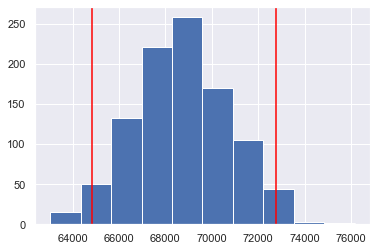

In [26]:
#Question 3c Bootstapping for Doctoral

boot_doc_mean=[]
for i in range(1000):
    boot_doc = resample(doctor['Q24'], replace = True, n_samples=len(doctor['Q24']))
    mean = np.mean(boot_doc)
    boot_doc_mean.append(mean)

boot_doc_mean = pd.DataFrame(boot_doc_mean)
plt.hist(boot_doc_mean)


alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(boot_doc_mean, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(boot_doc_mean, p)
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

plt.axvline(lower, color='red')
plt.axvline(upper, color='red')

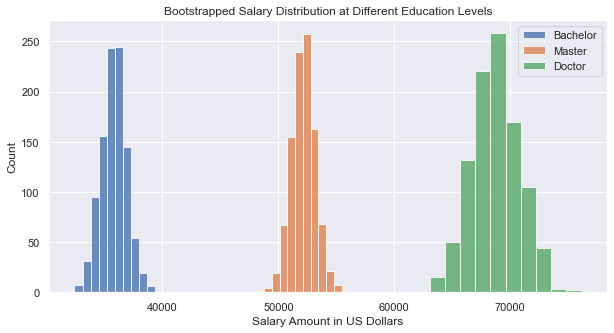

In [27]:
#Question 3c Bootstapping data on one plot
plt.figure(figsize=(10,5))
plt.hist(boot_bach_mean, alpha=0.8, label='Bachelor')
plt.hist(boot_mas_mean, alpha=0.8, label='Master')
plt.hist(boot_doc_mean, alpha=0.8, label='Doctor')
plt.legend()

plt.xlabel('Salary Amount in US Dollars')
plt.ylabel('Count')
plt.title('Bootstrapped Salary Distribution at Different Education Levels')
plt.show()

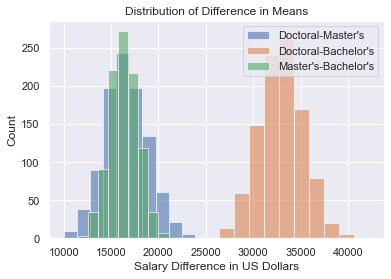

In [28]:
#Question 3c distribution of the difference in means
boot_diff_1 = pd.DataFrame(boot_doc_mean-boot_mas_mean)
boot_diff_2 = pd.DataFrame(boot_doc_mean-boot_bach_mean)
boot_diff_3 = pd.DataFrame(boot_mas_mean-boot_bach_mean)

plt.hist(boot_diff_1, alpha=0.6, label="Doctoral-Master's")
plt.hist(boot_diff_2, alpha=0.6, label="Doctoral-Bachelor's")
plt.hist(boot_diff_3, alpha=0.6, label="Master's-Bachelor's")
plt.legend()
plt.xlabel('Salary Difference in US Dollars')
plt.ylabel('Count')
plt.title('Distribution of Difference in Means')
plt.show()

In [29]:
#Question 3d Bootstapped ANOVA Test
fvalue, pvalue = stats.f_oneway(boot_bach_mean, boot_mas_mean, boot_doc_mean)
print ("Bootstrapped ANOVA-test: F-statistics = %g  P-value = %g" % (fvalue, pvalue))

Bootstrapped ANOVA-test: F-statistics = 125965  P-value = 0
